In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tensorflow-speech-recognition-challenge/link_to_gcp_credits_form.txt
/kaggle/input/tensorflow-speech-recognition-challenge/test.7z
/kaggle/input/tensorflow-speech-recognition-challenge/sample_submission.7z
/kaggle/input/tensorflow-speech-recognition-challenge/train.7z


In [2]:
!pip install pyunpack
!pip install patool
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 26.0 MB/s eta 0:00:00
  Attempting uninstall: brotli
    Found existing installation: Brotli 1.0.9
    Uninstalling Brotli-1.0.9:
      Successfully uninstalled Brotli-1.0.9


In [3]:
!apt-get install -y p7zip-full
!7z x ../input/tensorflow-speech-recognition-challenge/train.7z




p7zip-full is already the newest version (16.02+dfsg-7build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C,Utf16=off,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan ../input/tensorflow-speech-recognition-challenge/                                                           1 file, 1121103842 bytes (1070 MiB)

Extracting archive: ../input/tensorflow-speech-recognition-challenge/train.7z
--
Path = ../input/tensorflow-speech-recognition-challenge/train.7z
Type = 7z
Physical Size = 1121103842
Headers Size = 389133
Method = Delta LZMA2:24
Solid = +
Blocks = 2

  0%      0% 38 - train/audio/_background_noise_/doing_the_dishes.wav

16000
16000


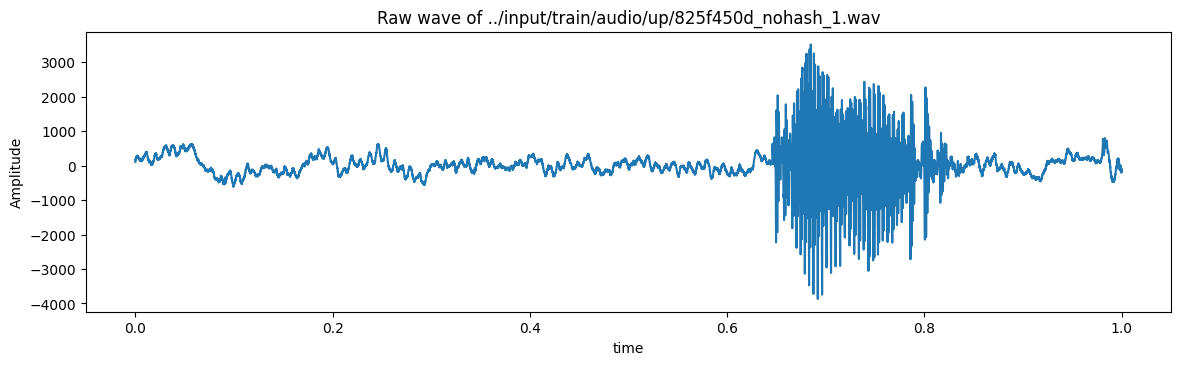

In [4]:
import matplotlib.pyplot as plt
from scipy.io import wavfile

train_audio_path = 'train/audio/'
filename = 'up/825f450d_nohash_1.wav'
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/up/825f450d_nohash_1.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)
print(sample_rate)
print(len(samples))

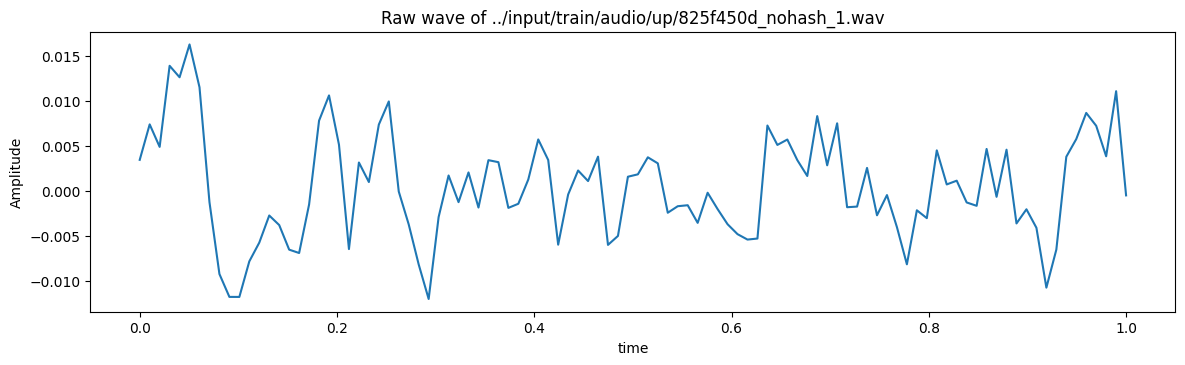

In [5]:
import librosa

samples, sample_rate = librosa.load(train_audio_path+'up/825f450d_nohash_1.wav', sr = 100)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/up/825f450d_nohash_1.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [6]:
import IPython.display as ipd

sample_rate=3000
samples, sample_rate = librosa.load(train_audio_path+'up/825f450d_nohash_1.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

In [7]:
sample_rate=16000
samples, sample_rate = librosa.load(train_audio_path+'up/825f450d_nohash_1.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

In [8]:
sample_rate=6000
samples, sample_rate = librosa.load(train_audio_path+'up/825f450d_nohash_1.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

In [9]:
sample_rate=12000
samples, sample_rate = librosa.load(train_audio_path+'up/825f450d_nohash_1.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

In [10]:
samples = librosa.resample(samples, orig_sr=sample_rate, target_sr=8000)
ipd.Audio(samples, rate=8000)